# Sampling from the Normal Distribution

In [1]:
#(C) Roman Makarov 2018
#Wilfrid Laurier University

In [2]:
#Functions and Libraries
import math
from scipy import stats
import numpy as np

In [3]:
def UnifRNG(N):
    val = np.random.rand(N)
    return val

In [4]:
UnifRNG(5)

array([ 0.53878691,  0.36678616,  0.75919856,  0.22619651,  0.23649115])

In [5]:
def BoxMuller(N): 
    NN = math.ceil(N/2.0)*2
    i = 0
    val = []
    while i<NN:
        u = UnifRNG(2)
        r = math.sqrt( -2.0 * math.log(u[0]))
        theta = 2.0 * math.pi * u[1]
        val.append(r * math.cos(theta))
        val.append(r * math.sin(theta))
        i = i + 2
    val = val[0:N]
    return val

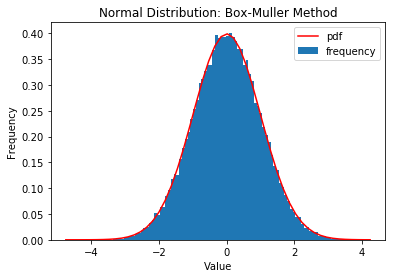

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
NV = BoxMuller(50000)
plt.hist(NV,100,normed=True, label='frequency')
plt.title('Normal Distribution: Box-Muller Method')
plt.xlabel('Value')
plt.ylabel('Frequency')
x = np.linspace(plt.axis()[0],plt.axis()[1])
plt.plot(x,stats.norm.pdf(x),'r',label='pdf')
plt.legend()
plt.show()


In [7]:
def AR_Normal(N): 
    val = []
    for i in range(0,N):
        reject = True
        while reject:
            u = UnifRNG(2)
            X = -math.log(u[0])
            if u[1] < math.exp( -0.5 * (X-1)**2 ):
                reject = False
        u = UnifRNG(1)
        if u[0] < 0.5:
            X = -X
        val.append(X)
    return val

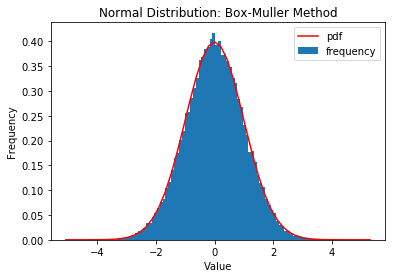

In [8]:
NV = AR_Normal(50000)
plt.hist(NV,100,normed=True, label='frequency')
plt.title('Normal Distribution: Box-Muller Method')
plt.xlabel('Value')
plt.ylabel('Frequency')
x = np.linspace(plt.axis()[0],plt.axis()[1])
plt.plot(x,stats.norm.pdf(x),'r',label='pdf')
plt.legend()
plt.show()